In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math
import sys
from IPython.display import clear_output
np.set_printoptions(threshold=sys.maxsize)

In [2]:
# image = np.genfromtxt('mat.csv', delimiter=';')
# print(image)
# h,w = image.shape
# imageG = np.zeros([h,w])
# imageG= cv2.copyMakeBorder(image,1,1,1,1,cv2.BORDER_REFLECT)
# print(imageG)

[[242 241 244 245 243 242 243 242 244 244 244 244 243 243 243 241 242 243
  240 238 224 121 100  76  69  60  55  58  50  51  50  53  48  50  52  49
   44  47  48  51  56  61  68  73  76  71  71  67  66  67  67  63  62  61
   62  61  61  65  73  84  89  92  94 100 106 108 111 122 120 109 108 122
  126 132 119 116 118 117 106 108 100  92  82  68  56  48  44  47  44  43
   42  41  43  45  40  39  40  42  46  67 172 232 239 243 242 244 244 242
  243 243 243 243 243 243 242 241 242 242 241 242 241 241 242 243 243 242
  241 239]
 [243 242 245 244 244 246 244 244 245 244 243 243 243 243 243 243 241 240
  237 226 203 102  86  71  63  61  54  54  54  56  51  50  45  52  51  45
   44  46  49  59  65  71  80  86  89  84  80  74  72  74  77  75  68  68
   68  68  64  65  71  81  88  91  95 100 105 104 108 113 122 117 104 126
  129 136 132 127 127 129 123 116 112 104  94  81  68  56  51  49  42  45
   45  42  39  41  37  43  38  41  46  52  82 178 236 240 242 243 244 243
  242 243 243 244 243 243 2

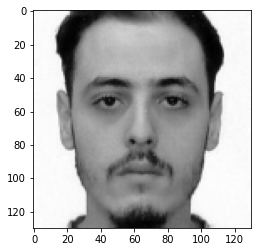

In [3]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

img = cv2.imread('sifo.jpg',0)
faces = face_cascade.detectMultiScale(img, 1.4, 4)
for (x, y, w, h) in faces:
    faces = img[y:y + h, x:x + w]
    cv2.imwrite('face1.jpg', faces)
face1 = cv2.imread('face1.jpg',0)
face1 = cv2.resize(face1,(128,128),interpolation = cv2.INTER_AREA)
cv2.imwrite('face1.jpg',face1)
h,w = face1.shape[:2]
print(face1)
print(h,w)

imageG = cv2.copyMakeBorder(face1,1,1,1,1,cv2.BORDER_REFLECT)
plt.imshow(imageG,cmap='gray')
height,width = imageG.shape[:2]
print(height,width)
# cv2.imshow('test',imageG)
# cv2.waitKey(0)

In [4]:
#gradient x
def gradientX(image):
    gx = np.zeros([h,w])
    for p in range(1,w+1) :
        for l in range(1,h+1) :
            gx[l-1,p-1] = int(image[l+1,p]) - int(image[l-1,p])
    return gx
gx = gradientX(imageG)
print(gx)

[[   1.    1.    1.   -1.    1.    4.    1.    2.    1.    0.   -1.   -1.
     0.    0.    0.    2.   -1.   -3.   -3.  -12.  -21.  -19.  -14.   -5.
    -6.    1.   -1.   -4.    4.    5.    1.   -3.   -3.    2.   -1.   -4.
     0.   -1.    1.    8.    9.   10.   12.   13.   13.   13.    9.    7.
     6.    7.   10.   12.    6.    7.    6.    7.    3.    0.   -2.   -3.
    -1.   -1.    1.    0.   -1.   -4.   -3.   -9.    2.    8.   -4.    4.
     3.    4.   13.   11.    9.   12.   17.    8.   12.   12.   12.   13.
    12.    8.    7.    2.   -2.    2.    3.    1.   -4.   -4.   -3.    4.
    -2.   -1.    0.  -15.  -90.  -54.   -3.   -3.    0.   -1.    0.    1.
    -1.    0.    0.    1.    0.    0.    0.    2.    1.    0.    1.    1.
     2.    1.    0.    1.    1.    1.    0.    1.]
 [   1.    2.   -1.   -1.    0.    3.    0.    1.    0.    0.   -1.   -1.
     0.    0.    0.    1.   -1.   -6.  -25. -102. -104.  -44.  -34.  -18.
   -17.  -11.  -11.  -12.   -2.   -7.   -7.  -12.   -3.   -2.

In [5]:
#gradient y
def gradientY(image):
    gy = np.zeros([h,w])
    for l in range(1,h+1) :
        for p in range(1,w+1) :
            gy[l-1,p-1] = int(imageG[l,p+1]) - int(imageG[l,p-1])
    return gy
gy = gradientY(imageG)
print(gy)

[[  -1.    2.    4.   -1.   -3.    0.    0.    1.    2.    0.    0.   -1.
    -1.    0.   -2.   -1.    2.   -2.   -5.  -16. -117. -124.  -45.  -31.
   -16.  -14.   -2.   -5.   -7.    0.    2.   -2.   -3.    4.   -1.   -8.
    -2.    4.    4.    8.   10.   12.   12.    8.   -2.   -5.   -4.   -5.
     0.    1.   -4.   -5.   -2.    0.    0.   -1.    4.   12.   19.   16.
     8.    5.    8.   12.    8.    5.   14.    9.  -13.  -12.   13.   18.
    10.   -7.  -16.   -1.    1.  -12.   -9.   -6.  -16.  -18.  -24.  -26.
   -20.  -12.   -1.    0.   -4.   -2.   -2.    1.    4.   -3.   -6.    0.
     3.    6.   25.  126.  165.   67.   11.    3.    1.    2.   -2.   -1.
     1.    0.    0.    0.    0.   -1.   -2.    0.    1.   -1.    0.    0.
    -1.    1.    2.    1.   -1.   -2.   -3.   -2.]
 [  -1.    2.    2.   -1.    2.    0.   -2.    1.    0.   -2.   -1.    0.
     0.    0.    0.   -2.   -3.   -4.  -14.  -34. -124. -117.  -31.  -23.
   -10.   -9.   -7.    0.    2.   -3.   -6.   -6.    2.    6.

In [6]:
#Magnitude
def magnitude(gx,gy):
    m = np.zeros([h,w])
    for l in range(h) :
        for p in range(w) :
            m[l,p]= math.sqrt( gx[l,p]**2 + gy[l,p]**2 )
    return m
m = magnitude(gx,gy)
print(m)

[[  1.41421356   2.23606798   4.12310563   1.41421356   3.16227766
    4.           1.           2.23606798   2.23606798   0.
    1.           1.41421356   1.           0.           2.
    2.23606798   2.23606798   3.60555128   5.83095189  20.
  118.86967654 125.44720005  47.12748667  31.40063694  17.08800749
   14.03566885   2.23606798   6.40312424   8.06225775   5.
    2.23606798   3.60555128   4.24264069   4.47213595   1.41421356
    8.94427191   2.           4.12310563   4.12310563  11.3137085
   13.45362405  15.62049935  16.97056275  15.26433752  13.15294644
   13.92838828   9.8488578    8.60232527   6.           7.07106781
   10.77032961  13.           6.32455532   7.           6.
    7.07106781   5.          12.          19.10497317  16.2788206
    8.06225775   5.09901951   8.06225775  12.           8.06225775
    6.40312424  14.31782106  12.72792206  13.15294644  14.4222051
   13.60147051  18.43908891  10.44030651   8.06225775  20.61552813
   11.04536102   9.05538514  16.970562

In [7]:
#direction
def direction(gx,gy):
    d = np.zeros([h,w])
    for l in range(h) :
        for p in range(w) :
            # d[l,p]= math.floor(math.degrees(math.atan( gy[l,p] / gx[l,p])))
            d[l,p]= math.floor(math.degrees(np.arctan2( gy[l,p],gx[l,p])))
            if d[l,p] < 0 :
                d[l,p] %= 360
    return d
d = direction(gx,gy)
print(d)

[[315.  63.  75. 225. 288.   0.   0.  26.  63.   0. 180. 225. 270.   0.
  270. 333. 116. 213. 239. 233. 259. 261. 252. 260. 249. 274. 243. 231.
  299.   0.  63. 213. 225.  63. 225. 243. 270. 104.  75.  45.  48.  50.
   45.  31. 351. 338. 336. 324.   0.   8. 338. 337. 341.   0.   0. 351.
   53.  90.  96. 100.  97. 101.  82.  90.  97. 128. 102. 135. 278. 303.
  107.  77.  73. 299. 309. 354.   6. 315. 332. 323. 306. 303. 296. 296.
  300. 303. 351.   0. 243. 315. 326.  45. 135. 216. 243.   0. 123.  99.
   90.  96. 118. 128. 105. 135.  90. 116. 270. 315. 135.   0.   0.   0.
    0. 270. 270.   0.  45. 270.   0.   0. 333.  45.  90.  45. 315. 296.
  270. 296.]
 [315.  45. 116. 225.  90.   0. 270.  45.   0. 270. 225. 180.   0.   0.
    0. 296. 251. 213. 209. 198. 230. 249. 222. 231. 210. 219. 212. 180.
  135. 203. 220. 206. 146. 108. 225. 299. 153.  51.  42.  40.  29.  28.
   28.  22. 354. 342. 338. 342.   0.  22.   3. 339. 342.   0.   0. 348.
  348.  34.  72.  96. 101.  81.  56.  63.  75. 123.

[2459 1876 2184 1686 2084 1933 2489 1673]
[  0  45  90 135 180 225 270 315 360]


(array([2459., 1876., 2184., 1686., 2084., 1933., 2489., 1673.]),
 array([  0,  45,  90, 135, 180, 225, 270, 315, 360]),
 <BarContainer object of 8 artists>)

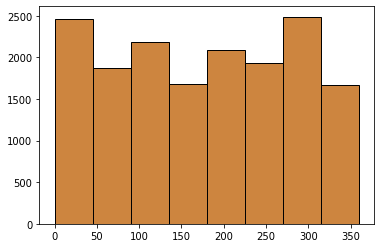

In [8]:
bins = [0, 45, 90, 135, 180, 225, 270, 315, 360]
np.histogram(d, bins = bins)
hist, bins = np.histogram(d, bins = bins)
print (hist) 
print (bins) 
plt.hist(d.ravel(),bins=bins, color='peru', ec = 'black')


In [9]:
#regions
def create_regions(test_image,bloc_size_r,bloc_size_c):
    regions = []
    for r in range(0,test_image.shape[0], bloc_size_r):
        for c in range(0,test_image.shape[1], bloc_size_c):
            window = test_image[r:r+bloc_size_r,c:c+bloc_size_c]
            regions.append(window)
    return np.array(regions)
bloc_size_r = 8
bloc_size_c = 8
regions = create_regions(d,bloc_size_c,bloc_size_r)
print(regions)

[[[315.  63.  75. 225. 288.   0.   0.  26.]
  [315.  45. 116. 225.  90.   0. 270.  45.]
  [  0.   0. 153. 180.  45. 180. 270.  90.]
  [  0.   0.   0.  90.  45. 198.   0.   0.]
  [315. 270.  90.  90. 225. 180. 146. 180.]
  [225. 270.   0.   0. 225. 296. 180. 135.]
  [180.  90.  45. 315. 270. 296. 333.  63.]
  [180.  45.  90. 270. 270. 180.   0.   0.]]

 [[ 63.   0. 180. 225. 270.   0. 270. 333.]
  [  0. 270. 225. 180.   0.   0.   0. 296.]
  [135. 315. 315.   0.   0.   0. 225. 225.]
  [ 90.   0. 333. 333. 270. 198. 213. 198.]
  [135. 135.   0. 243. 270. 236. 270. 270.]
  [116. 153. 270. 206. 296. 341.   0. 254.]
  [ 90. 116.   0. 270. 180. 251. 270. 240.]
  [  0. 135. 180. 243. 236. 180. 246. 231.]]

 [[116. 213. 239. 233. 259. 261. 252. 260.]
  [251. 213. 209. 198. 230. 249. 222. 231.]
  [270. 257. 227. 215. 204. 231. 209. 208.]
  [234. 234. 227. 239. 213. 218. 210. 219.]
  [235. 229. 234. 214. 239. 238. 208. 229.]
  [230. 232. 252. 221. 227. 240. 218. 225.]
  [233. 233. 229. 235. 206. 

[ 9  3 25 12  6  3  4  2]
[  0  45  90 135 180 225 270 315 360]


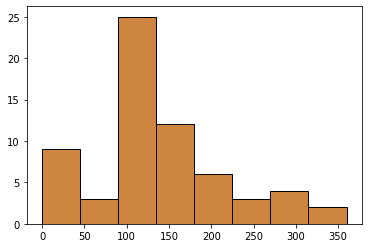

In [10]:
def click_event(event, x, y, flags, params):
    clear_output(wait=True)
    if event == cv2.EVENT_LBUTTONDOWN:
        # print(x, ' ', y)
        region_x = math.floor(x/8)
        region_y = math.floor(y/8)
        # print(region_x,region_y)
        region = regions[(region_y*16) + region_x]
        # print(region)
        bins = [0, 45, 90, 135, 180, 225, 270, 315, 360]
        np.histogram(region, bins = bins)
        hist, bins = np.histogram(region, bins = bins)
        print (hist)
        print (bins)
        plt.hist(region.ravel(),bins=bins, color='peru', ec = 'black')
        plt.show()

cv2.imshow('Image',face1)
cv2.setMouseCallback('Image',click_event)
cv2.waitKey(0)
cv2.destroyAllWindows()